In [1]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

def bar(orientation,data,title,color,labels):
    plt.figure(figsize = (15, 10))
    if orientation == 'horizontal': 
        plt.barh(data[0],data[1],color=color)
    else: 
        plt.bar(data[0],data[1],color=color)
    plt.title(title, fontsize=20)
    plt.xlabel(labels[0], fontsize=15)
    plt.xticks(fontsize=12)
    plt.ylabel(labels[1], fontsize=15)
    plt.yticks(fontsize=10)
    plt.show()


def wordcloud(counts, title): 
    word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title,fontsize=18)
    plt.show()

In [16]:
from bibleMarginalia import *
from getTexts import * 
# EP: /Users/amycweng/Digital Humanities/eebotcp/texts
# TCP: /Users/amycweng/Digital Humanities/TCP 

csv_data = pd.read_csv('/Users/amycweng/Digital Humanities/sermons.csv')
tcpIDs = [ _ for _ in csv_data['id']]

all_specials = []
for idx, tcpID in enumerate(tcpIDs):
    # print(f'processed {tcpID}') 
    path = findTextTCP(tcpID)
    notes, specials = getMarginalia(path)
    for case in specials: 
        all_specials.append(case.split(' ')[0])
    # with open(f'/Users/amycweng/Digital Humanities/charityMargin/{tcpID}NOTES.txt','w') as file: 
    #     for note in notes[0]: 
    #         file.write(f'{note}\n')
    if len(notes[1]) > 0: 
        print(f'Outliers for {tcpID}: ', notes[1])
    if (idx+1) % 10 == 0 and idx != 0: 
        print(f'Processed {idx+1} files.')
print('Possibly missing abbreviations: ', Counter(all_specials))

Outliers for A01538:  ['Exodus  20 1*']
Outliers for A01531:  ['Romans  4 16*', 'Jeremiah  17 2* 23', 'John  14:15*21']
Outliers for A01528:  ['Matthew  19:2*']
Outliers for A01523:  ['Ecclesiastes  12 1 *8', 'Jeremiah  *9:30']
Outliers for A01547:  ['Ephesians  1:1*']
Processed 10 files.
Outliers for A01979:  ['Matthew  10 2*', 'Revelation  3:1*']
Outliers for A85487:  ['Nehemiah   2 4-4 4-4 9-5 19-6 14-13 14-22-29', 'Nehemiah   1 8-6 14-13 14-22-29-31']
Processed 20 files.
Processed 30 files.
Outliers for A10027:  ['Ephesians  2 1*', 'Romans  6:1*', 'Romans  6:1*']
Processed 40 files.
Outliers for A72143:  ['Psalms  18:2*']
Processed 50 files.
Outliers for A01529:  ['Ecclesiastes  4 1*']
Outliers for A01980:  ['John  1* 45']
Processed 60 files.
Processed 70 files.
Possibly missing abbreviations:  Counter({'c': 15, 'l': 10, 'cap': 9, 'fur': 8, 'chap': 7, 'io': 7, 'sirac': 7, 'ibid': 6, 'trist': 5, 'ma': 4, 'wisd': 4, 'amor': 4, 'sal': 4, 'trinum': 4, 'heaut': 4, 'vers': 4, 'v': 4, 'th

In [11]:
from charity_citations import * 

all_notes = []
all_books = []
all_chapters = []
charity_margin = {}
all_margin = {}

folder = '/Users/amycweng/Digital Humanities/charityMargin'
for notesfile in os.listdir(folder): 
    tcpID = notesfile.split('NOTES')[0]
    charity_margin[tcpID] = []

    notesfile = open(f'{folder}/{notesfile}','r')
    notes = [note.strip('\n').strip(',') for note in notesfile.readlines()]
    notesfile.close()

    all_notes.extend(notes)
    all_margin[tcpID] = notes
    for n in notes:             
        if n in bible_charity: 
            charity_margin[tcpID].append(n)
        book = n.split(' ')
        if book[0] == '1' or book[0] == '2': 
            all_books.append(f'{book[0]} {book[1]}')
            chapter = book[2].split(':')[0]
            all_chapters.append(f'{book[0]} {book[1]} {chapter}')
        else: 
            all_books.append(book[0])
            chapter = book[1].split(':')[0]
            all_chapters.append(f'{book[0]} {chapter}')

In [12]:
charity_citations_file = open(f'marginalia.charity.sermons.txt','w')
all_citations_file = open(f'marginalia.all.sermons.txt','w')
for tcpID, margin in charity_margin.items(): 
    charity_citations_file.write(f'{tcpID} -- {"; ".join(margin)}\n')
    all_citations_file.write(f'{tcpID} -- {"; ".join(all_margin[tcpID])}\n')
charity_citations_file.close()
all_citations_file.close()

{'Psalms': 2339, 'Matthew': 1103, 'Romans': 771, 'Isaiah': 691, 'Genesis': 668, 'Proverbs': 608, 'Luke': 559, '1 Corinthians': 532, 'John': 494, 'Acts': 432, 'Hebrews': 431, '2 Corinthians': 427, 'Jeremiah': 395, 'Job': 376, 'Ephesians': 332, 'Revelation': 299, '2 Samuel': 297, 'Deuteronomy': 263, 'Exodus': 254, 'Ecclesiastes': 253, 'James': 244, '1 John': 236, '1 Samuel': 217, 'Ezekiel': 211, '1 Peter': 210}


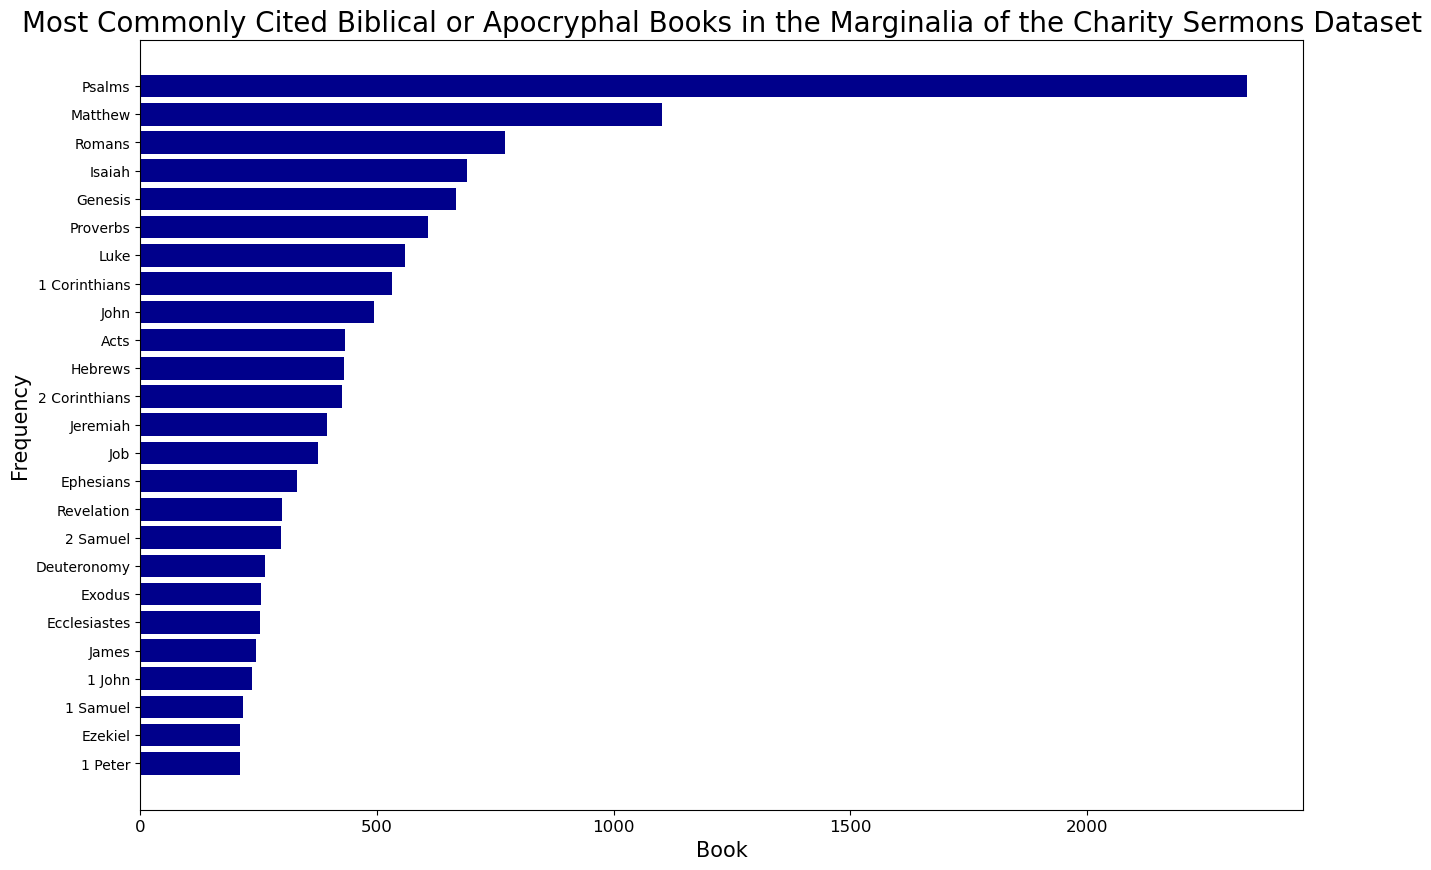

In [17]:
book_counts = dict(Counter(all_books).most_common(n=25))
print(book_counts)
book_counts = sorted([(line, freq) for line, freq in book_counts.items() if freq > 1],key=lambda k: (k[1], k[0]))
x,y = [],[]
for word,freq in book_counts: 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Most Commonly Cited Biblical or Apocryphal Books in the Marginalia of the Charity Sermons Dataset','darkblue',('Book','Frequency'))

[('Psalms 119', 224), ('Romans 8', 162), ('Matthew 5', 114), ('Matthew 26', 102), ('James 1', 100), ('Matthew 6', 97), ('Romans 5', 90), ('1 John 3', 89), ('2 Corinthians 5', 89), ('Philippians 3', 84), ('Hebrews 12', 83), ('Ephesians 4', 81), ('1 Thessalonians 5', 77), ('Ephesians 5', 76), ('Psalms 51', 75), ('Lamentations 3', 71), ('1 Peter 1', 71), ('Romans 6', 69), ('Romans 7', 67), ('Genesis 3', 67), ('Hebrews 11', 66), ('Matthew 13', 66), ('1 Corinthians 15', 66), ('2 Corinthians 4', 64), ('Hebrews 13', 63)]


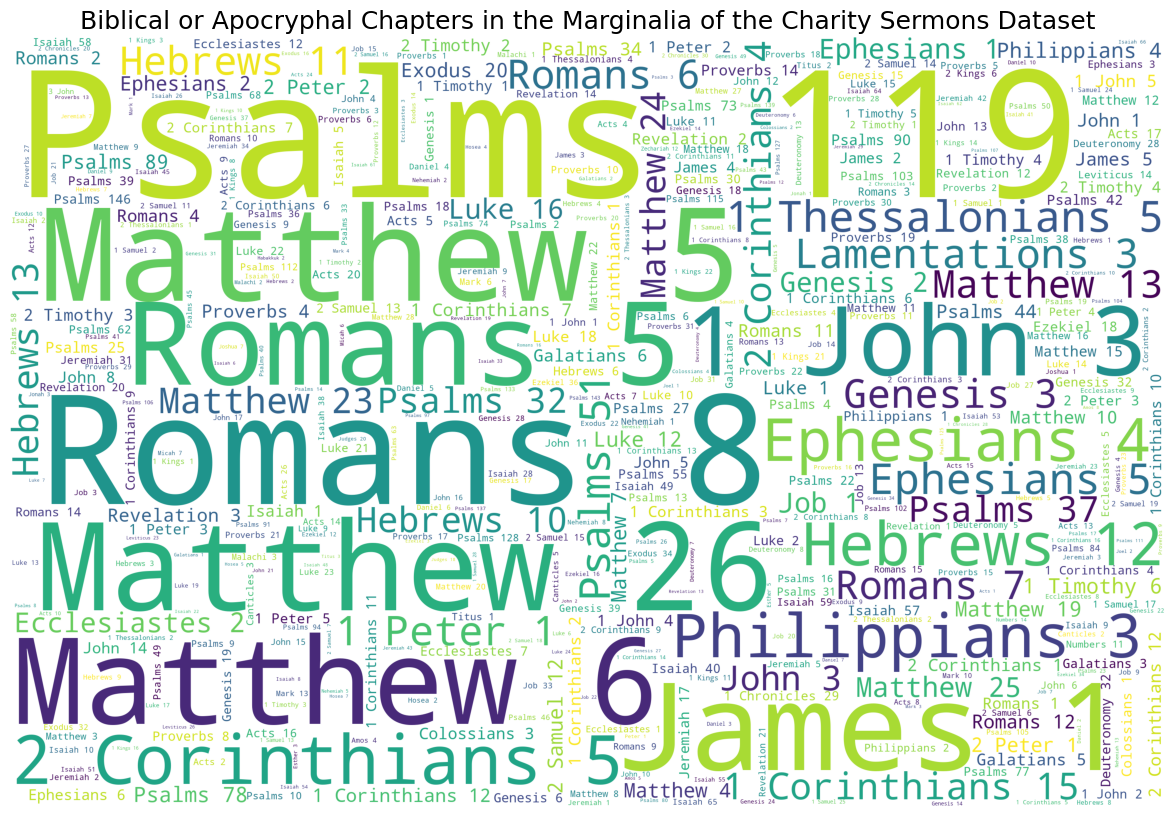

In [18]:
chapter_counts = Counter(all_chapters)
print(chapter_counts.most_common(n=25))
wordcloud(chapter_counts,'Biblical or Apocryphal Chapters in the Marginalia of the Charity Sermons Dataset')

[('James 1:17', 21), ('Revelation 20:6', 19), ('Romans 14:17', 17), ('Hebrews 13:5', 17), ('1 Peter 5:8', 17), ('Job 13:15', 17), ('Romans 5:3', 16), ('Genesis 2:7', 16), ('Philippians 3:8', 15), ('Matthew 26:41', 15), ('Genesis 2:18', 15), ('Jeremiah 17:9', 14), ('John 3:16', 14), ('Hebrews 11:1', 14), ('1 Timothy 5:8', 14), ('Matthew 19:6', 14), ('Romans 5:5', 14), ('Romans 7:24', 14), ('2 Corinthians 4:4', 13), ('Acts 15:9', 13), ('Philippians 4:6', 13), ('Revelation 14:13', 13), ('Hebrews 12:6', 13), ('1 Peter 1:23', 13), ('Psalms 4:6', 13)]


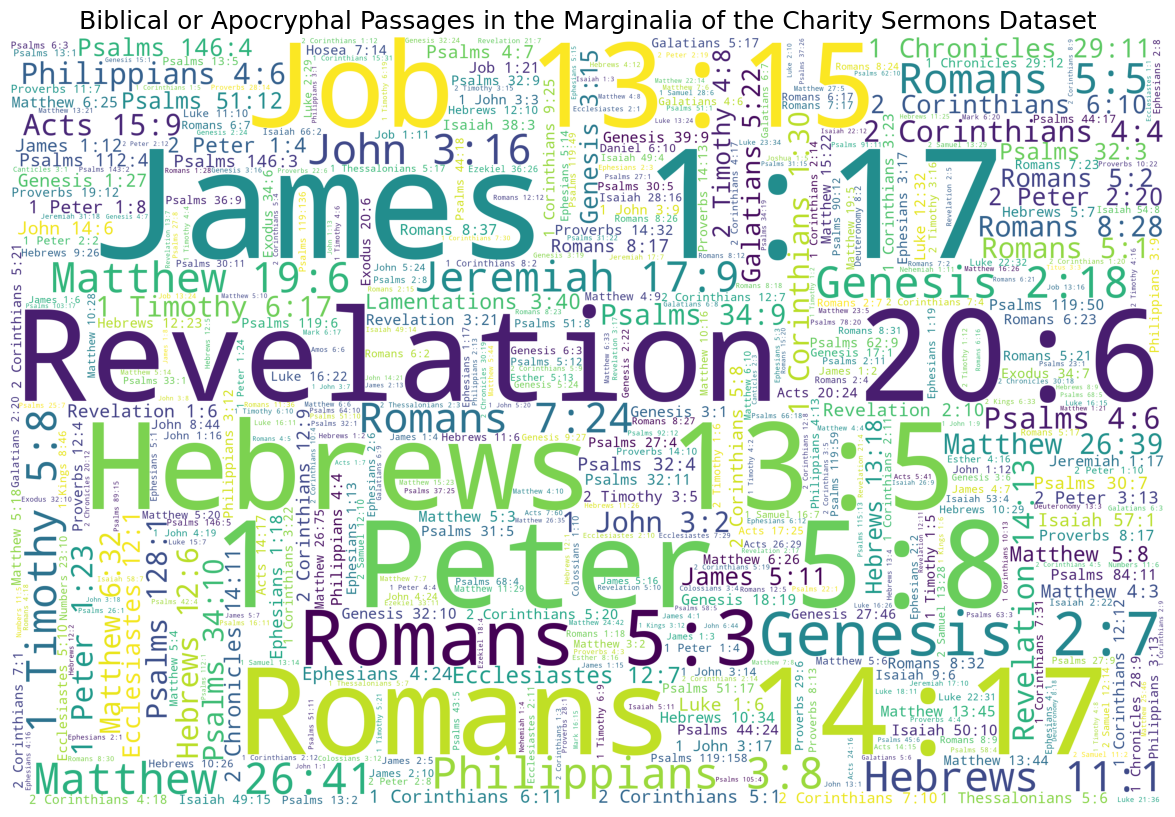

In [19]:
passage_counts = Counter(all_notes)
print(passage_counts.most_common(n=25))
wordcloud(passage_counts,'Biblical or Apocryphal Passages in the Marginalia of the Charity Sermons Dataset')

In [20]:
newTestament = ['Matthew', 'Mark', 'Luke', 'John','Acts','Romans','1 Corinthians','2 Corinthians','Galatians','Ephesians','Philippians','Colossians','1 Thessalonians','2 Thessalonians','1 Timothy','2 Timothy','Titus','Philemon','Hebrews','James','1 Peter','2 Peter','1 John', '2 John','3 John','Jude','Revelation']
oldTestament = ['Genesis','Exodus','Leviticus','Numbers','Deuteronomy','Joshua','Judges','Ruth','1 Samuel','2 Samuel','1 Kings','2 Kings','1 Chronicles','2 Chronicles','Ezra','Nehemiah','Esther','Job','Psalms','Proverbs','Ecclesiastes','Canticles','Isaiah','Jeremiah','Lamentations','Ezekiel','Daniel','Hosea','Joel','Amos','Obadiah','Jonah','Micah','Nahum','Habakkuk','Zephaniah','Haggai','Zechariah','Malachi']

newTcount, oldTcount = 0,0

book_counts = dict(Counter(all_books))
for book, count in book_counts.items(): 
    found = False
    if book in newTestament: 
        newTcount += count 
        found = True
    elif book in oldTestament: 
        oldTcount += count
        found = True
print(f'New T {newTcount} and Old T {oldTcount}')

New T 7391 and Old T 8329


There are 147 citations of charity-related passages.
Lines cited only once:  ['1 Corinthians 16:1', 'Galatians 2:10', 'Ephesians 4:28', 'Ezekiel 16:49', '1 Corinthians 13:3', 'Acts 10:2', 'James 2:15', '1 Corinthians 16:2', '2 Corinthians 9:6', 'Job 29:12', 'Hebrews 13:2', 'Proverbs 3:28', 'Acts 11:29', 'Acts 11:30', '2 Corinthians 8:3', 'Luke 14:14', 'Luke 11:41', 'Proverbs 21:13', 'Proverbs 11:25', 'Luke 12:33', 'Acts 2:45', '2 Corinthians 8:11', '1 John 3:16', 'Luke 14:12', 'Isaiah 1:17', 'Titus 3:14', 'Luke 4:18', 'Job 31:22', 'Proverbs 14:31', 'Proverbs 17:5', 'Proverbs 11:26', 'Deuteronomy 15:7', 'Proverbs 3:27', 'Matthew 19:21', 'Acts 20:35']


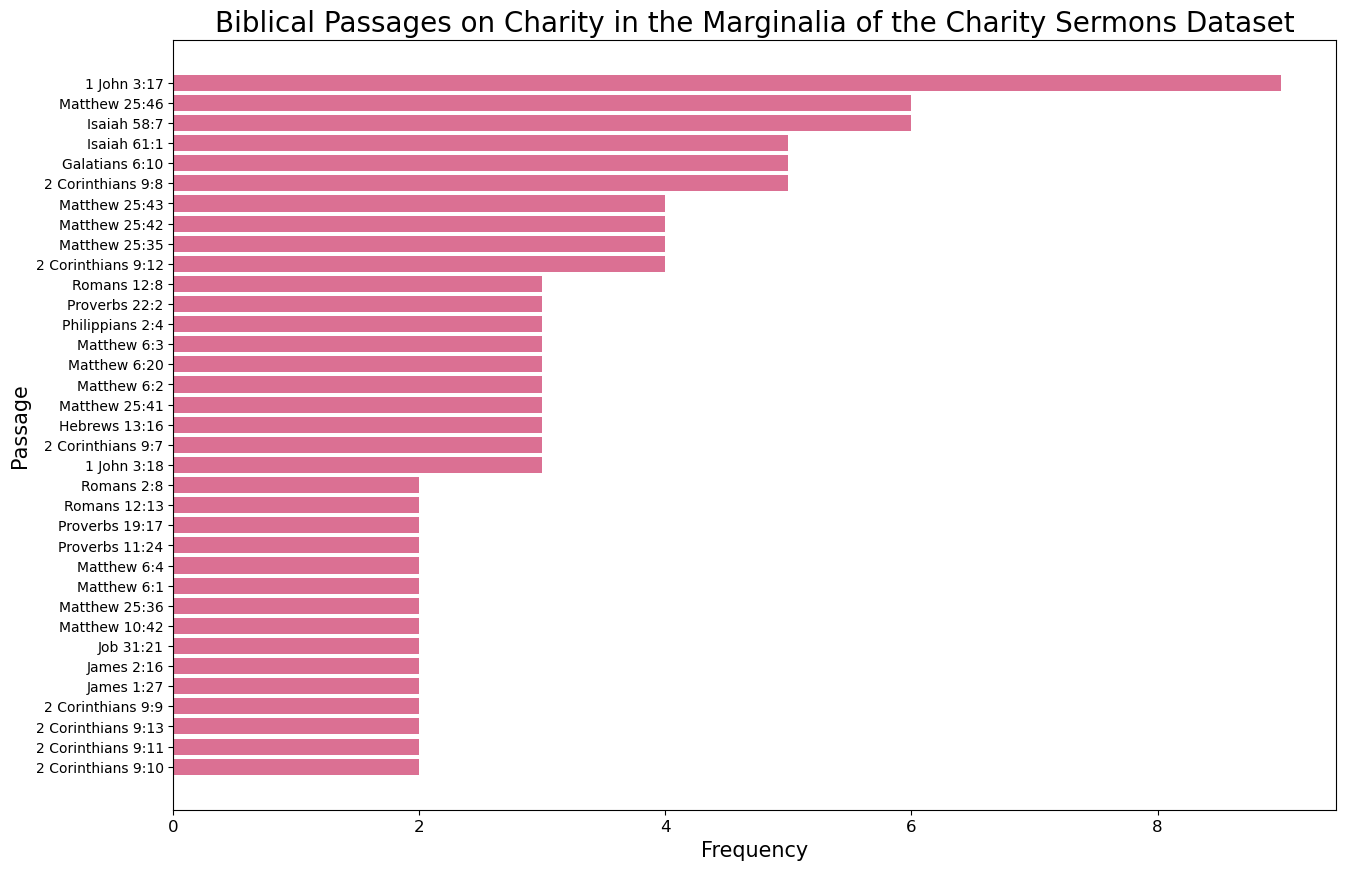

In [21]:
all_charity = []
for c_list in charity_margin.values():
    all_charity.extend(c_list)
print(f'There are {len(all_charity)} citations of charity-related passages.')
charity_counts = dict(Counter(all_charity))
print('Lines cited only once: ', [line for line, freq in charity_counts.items() if freq == 1])
charity_counts = sorted([(line, freq) for line, freq in charity_counts.items() if freq > 1],key=lambda k: (k[1], k[0]))
x,y = [],[]
for word,freq in charity_counts: 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Biblical Passages on Charity in the Marginalia of the Charity Sermons Dataset','palevioletred',('Frequency','Passage'))